### 다중 선형회귀 - 보스톤 주택 가격

In [1]:
# 다중회귀는 feature값이 여러개인것

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

- 데이터 탐색

In [3]:
df = pd.read_csv('data/Boston_house.csv')
df.shape

(506, 14)

In [4]:
df.head()
# ㅍ

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [5]:
#  [07]  AGE	1940년 이전에 건축된 소유주택의 비율
#  [12]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
#  [06]  RM	주택 1가구당 평균 방의 개수
#  [01]  CRIM	자치시(town) 별 1인당 범죄율
#  [08]  DIS	5개의 보스턴 직업센터까지의 접근성 지수
#  [02]  ZN	25,000 평방피트를 초과하는 거주지역의 비율
#  [03]  INDUS	비소매상업지역이 점유하고 있는 토지의 비율
#  [04]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
#  [05]  NOX	10ppm 당 농축 일산화질소
#  [09]  RAD	방사형 도로까지의 접근성 지수
#  [10]  TAX	10,000 달러 당 재산세율
#  [11]  PTRATIO	자치시(town)별 학생/교사 비율
#  [13]  LSTAT	모집단의 하위계층의 비율(%)
#  [14]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)

- Feature 별 산점도와 선형회귀선

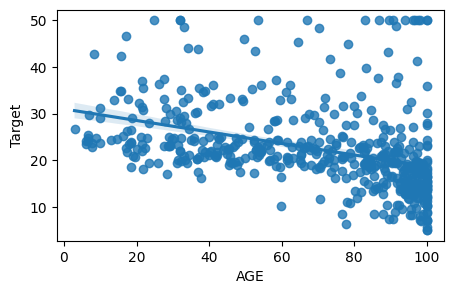

In [6]:
plt.figure(figsize=(5,3))
sns.regplot(x='AGE', y='Target', data=df);

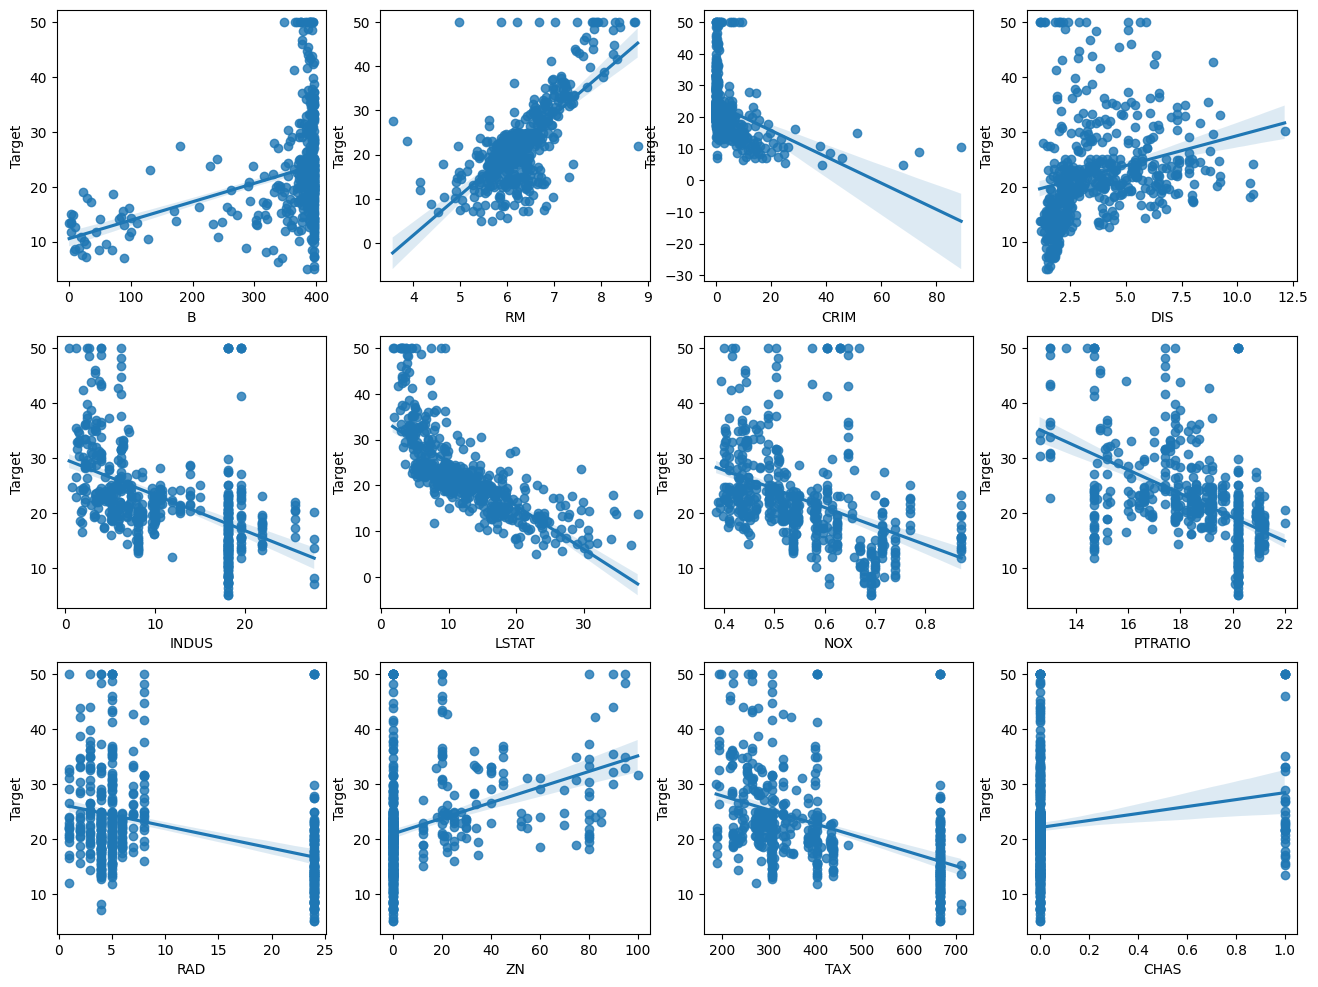

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(16,12))  # 그림을 3행 4열로 보여줘라
for i, feature in enumerate(df.columns[1:-1]):  # target빼려고
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])

- Feature 별 결정 계수(R squared)

In [8]:
# 결정 계수 값 좋은것은 RM,LSTAT
# LSTAT 방의 개수가 아니라 좋은동네...상위계층이 사는곳이 비율이 더 크다는

In [9]:
from sklearn.linear_model import LinearRegression 
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, df.Target.values)
    score = lr.score(X, df.Target.values)
    print(f'{feature}: {score:.4f}')

AGE: 0.1421
B: 0.1112
RM: 0.4835
CRIM: 0.1508
DIS: 0.0625
INDUS: 0.2340
LSTAT: 0.5441
NOX: 0.1826
PTRATIO: 0.2578
RAD: 0.1456
ZN: 0.1299
TAX: 0.2195
CHAS: 0.0307


### 다중 선형회귀

In [10]:
# feature을 모두다 포함해서 하는게 다중 회귀
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.Target.values, test_size=0.1, random_state=2023
)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# 결정 계수 (R squared)
lr.score(X_test, y_test)

0.7271717469533648

In [13]:
# 가중치
lr.coef_

array([-1.10277063e-03,  7.58599968e-03,  3.87404592e+00, -1.08509288e-01,
       -1.47219747e+00,  2.93056817e-02, -5.45214900e-01, -1.77344364e+01,
       -8.96196130e-01,  2.79148815e-01,  4.73634512e-02, -1.16000238e-02,
        2.88757692e+00])

In [14]:
# 편향
lr.intercept_

35.78228139597018

- 회귀식
  Target = -0.0011 * AGE + 0.0076 * B + 3.9 * RM + ... + 2.9 * CHAS + 35.8

- 테스트 데이터에 적용

In [15]:
X_test[0], y_test[0]

(array([ 95.3    , 319.98   ,   6.006  ,   7.02259,   1.8746 ,  18.1    ,
         15.7    ,   0.718  ,  20.2    ,  24.     ,   0.     , 666.     ,
          0.     ]),
 14.2)

In [16]:
# weight와 bias를 이용하여 직접 계산 
np.dot(lr.coef_, X_test[0]) + lr.intercept_

17.958305169593746

In [17]:
# predict() method사용
lr.predict(X_test[0].reshape(1,-1))[0]

17.958305169593746

In [18]:
# 10개 데스트 데이터에 적용
pred = lr.predict(X_test)
for i in range(10):
    print(f'실제값: {y_test[i]}, \t예측값: {pred[i]:.4f}')

실제값: 14.2, 	예측값: 17.9583
실제값: 15.6, 	예측값: 15.6069
실제값: 23.7, 	예측값: 27.4749
실제값: 20.4, 	예측값: 19.7022
실제값: 23.1, 	예측값: 24.9588
실제값: 50.0, 	예측값: 40.8837
실제값: 23.2, 	예측값: 22.2554
실제값: 36.0, 	예측값: 36.1518
실제값: 17.1, 	예측값: 19.5734
실제값: 14.1, 	예측값: 16.1215


##### 회귀는 꼭 선형회귀이어야 하는가?

- SVR

In [19]:
from sklearn.svm import SVR 
from sklearn.metrics import r2_score, mean_squared_error 

In [20]:
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)

In [21]:
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

- Random Forest Refressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

- XGBoost

In [24]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

- Linear Regression

In [25]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

- 비교

In [26]:
print('\t\tLR\tSV\tRF\tXG')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f},\t{r2_xg:.4f}')
print(f'mean_squared_E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f},\t{mse_xg:.4f}')

		LR	SV	RF	XG
R squared	0.7272	0.2042	0.8654,	0.8787
mean_squared_E	18.3886	53.6350	9.0700,	8.1727


In [27]:
df = pd.DataFrame({
    'y':y_test, 'LR':pred_lr, 'SV':pred_sv, 'RF':pred_rf, 'XG':pred_xg
})
df.head(10)

,y,LR,SV,RF,XG
0,14.2,17.958305,15.017989,15.430,14.725801
1,15.6,15.606944,21.968696,16.820,15.861876
2,23.7,27.474924,23.817999,24.539,27.065056
3,20.4,19.702224,22.621478,19.720,19.290201
4,23.1,24.958797,23.143946,23.892,23.544884
5,50.0,40.883669,19.982511,47.424,52.144672
6,23.2,22.255425,15.991492,19.329,19.173691
7,36.0,36.151795,22.930248,36.021,34.340393
8,17.1,19.573404,19.179914,18.546,18.095255
9,14.1,16.121493,13.387749,15.023,14.961949


##### 규제 선형회귀

- Ridge - L2 규제

In [28]:
from sklearn.linear_model import Ridge 
ridge = Ridge(random_state=2023)
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 2023,
 'solver': 'auto',
 'tol': 0.0001}

In [29]:
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)

In [30]:
r2_rg, mse_rg

(0.7247569398981952, 18.551363202899005)

- Lasso L1규제

In [32]:
from sklearn.linear_model import Lasso 
lasso = Lasso(random_state=2023)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 2023,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [34]:
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)

In [35]:
r2_ls, mse_ls

(0.6758523078239078, 21.847532020302374)

In [37]:
print('\t\tLR\tSV\tRF\tXG\tRidge\tLasso')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f},\t{r2_xg:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}')
print(f'mean_squared_E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}')

		LR	SV	RF	XG	Ridge	Lasso
R squared	0.7272	0.2042	0.8654,	0.8787	0.7248	0.6759
mean_squared_E	18.3886	53.6350	9.0700	8.1727	18.5514	21.8475


In [39]:
df['Ridge'] = pred_rg 
df['Lasso'] = pred_ls
df.head(10)

,y,LR,SV,RF,XG,Ridge,Lasso
0,14.2,17.958305,15.017989,15.430,14.725801,18.282171,19.242233
1,15.6,15.606944,21.968696,16.820,15.861876,15.802795,17.764299
2,23.7,27.474924,23.817999,24.539,27.065056,27.554811,28.284153
3,20.4,19.702224,22.621478,19.720,19.290201,20.222149,23.162536
4,23.1,24.958797,23.143946,23.892,23.544884,25.112457,26.171419
5,50.0,40.883669,19.982511,47.424,52.144672,40.406442,35.421685
6,23.2,22.255425,15.991492,19.329,19.173691,21.847296,20.431429
7,36.0,36.151795,22.930248,36.021,34.340393,36.478912,34.682434
8,17.1,19.573404,19.179914,18.546,18.095255,19.616287,19.385382
9,14.1,16.121493,13.387749,15.023,14.961949,16.428536,15.824913


In [ ]:
ls